# Project 3

### Huiqian Wang(hw8849)

### 1 Introduction

Since I am going to apply for a graduate school this year, I wonder what factors may affect the admission rate and their relationship. I found this `Graduate Amission` dataset on Kaggle platform. The dataset is owned by Mohan S Acharya. It contains several parameters which are considered important during the application for Masters Programs:
    
1. `GRE Scores` ( out of 340 )
2. `TOEFL Scores` ( out of 120 )
3. `University Rating` ( out of 5 )
4. `Statement of Purpose(SOP)` ( out of 5)
5. `Letter of Recommendation Strength(LOR)` ( out of 5 ) 
6. `Undergraduate GPA` ( out of 10 )
7. `Research Experience` ( either 0 or 1 )
8. `Chance of Admit` ( ranging from 0 to 1 )

There are 500 observations and 8 variables (excluding the first column which is just a counting of No.).

Note that the data is from Indian perspective and also it was sampled for engineering students specifically.

### 2 Dataset Manipulating and EDA

In [1]:
import numpy as np
import pandas as pd

In [2]:
grad = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [3]:
grad.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [14]:
# Remove extra space in variable name
grad.columns = grad.columns.str.strip()

In [5]:
grad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


We can see that the variable types are not correct, some of them are catagorical variable, so we need to modify them.

In [6]:
grad['University Rating'] = grad['University Rating'].astype('object')
grad['SOP'] = grad['SOP'].astype('object')
grad['Research'] = grad['Research'].astype('object')
grad = grad.astype({'LOR':'object'})

In [7]:
grad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    object 
 4   SOP                500 non-null    object 
 5   LOR                500 non-null    object 
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    object 
 8   Chance of Admit    500 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 35.3+ KB


In [8]:
# statistics of GRE and CGPA
grad[["GRE Score", "CGPA"]].describe()

,GRE Score,CGPA
count,500.000000,500.000000
mean,316.472000,8.576440
std,11.295148,0.604813
min,290.000000,6.800000
25%,308.000000,8.127500
50%,317.000000,8.560000
75%,325.000000,9.040000
max,340.000000,9.920000


The average GRE score among all Indian students are around 316.
The minimum GPA is 6.8, and the maximum GPA is 9.92, which is really close to full score 10.0.

In [15]:
# Get the mean of each research group according to chance of admission
grad.filter(['Chance of Admit', 'Research']).groupby(['Research']).mean()

,Chance of Admit
Research,
0,0.634909
1,0.789964


Students with research will have a 0.79 chance of admission, which is 0.16 higher than those without research.

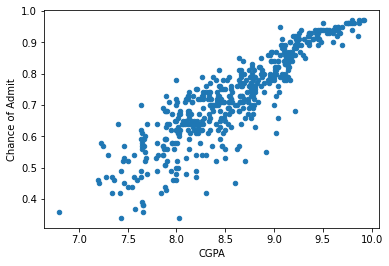

In [10]:
# Use pandas to create a scatterplot of CGPA and chance of admit
grad.plot.scatter(x = 'CGPA', y = 'Chance of Admit')

From the plot, we observe that CGPA and chance of admit seem to have a positive linear relationship. The higher the CGPA is, the more chance the student will get admitted.

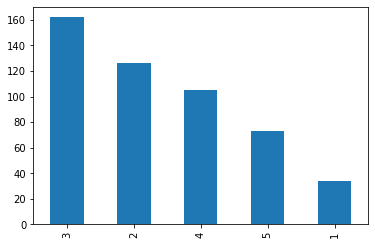

In [11]:
# Create a barplot by displaying counts of University Rating
grad['University Rating'].value_counts().plot(kind = "bar")

We can see that Univeristy with rating 3 have the maximum amount of students.
University with rating 1 have the least students.

In [12]:
import seaborn as sns

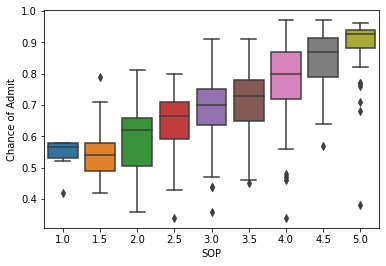

In [16]:
# Create boxplot of statement of purpose and chance of admit
sns.boxplot(x="SOP", y="Chance of Admit", data=grad)

This graph shows that high degree of Statement of Purpose means high probability of getting admission. However, there are still several outliers to have high degree of SOP with a low chance of admit.